In [1]:
import matplotlib.pylab as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import Estimation as st
import tables as tb
from Histogram import Histogram as hist
from PDF import PDF
from Utils import IsotopeDic, PartDic
from scipy.stats import poisson
import scipy.optimize as sop
import numpy as np
from scipy.special import gammaln
from copy import deepcopy

In [5]:
import fitFunctions as ff

In [6]:
f = tb.open_file("pull_data.h5", "r")
pull_list = f.root.pull_list[:]


In [50]:
fun = ff.gauss
lim = 5
xp = np.linspace(-lim,lim,1000)

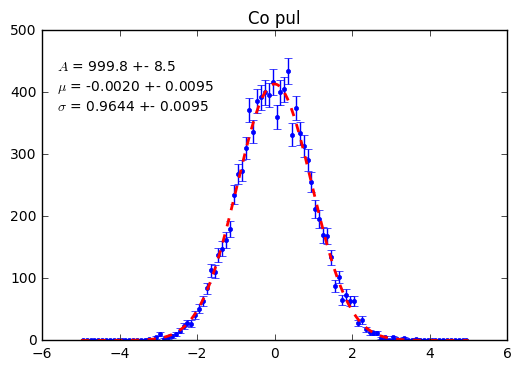

In [116]:
pull_Co = pull_list[:,0]
h_co = np.histogram(pull_Co,bins=100,range=[-lim,lim])
fit_co = ff.fit_gauss(h_co[1][:-1] + np.diff(h_co[1])/2.,h_co[0],[100,0,1])
res_co = [fit_co[0], 0]
res_co[1] = np.sqrt(np.diag(fit_co[1]))

plt.errorbar(h_co[1][:-1] + np.diff(h_co[1])/2.,h_co[0],h_co[0]**0.5,marker='.',linestyle='None')
plt.plot(xp, fun(xp,res_co[0][0],res_co[0][1],res_co[0][2]),linewidth=2,color='red',linestyle='--')
plt.figtext(0.15,0.8, ('$A$ = %0.1f +- %0.1f' % (res_co[0][0] , res_co[1][0])))
plt.figtext(0.15,0.75, ('$\mu$ = %0.4f +- %0.4f' % (res_co[0][1] , res_co[1][1])))
plt.figtext(0.15,0.7, ('$\sigma$ = %0.4f +- %0.4f' % (res_co[0][2] , res_co[1][2])))
plt.title('Co pul')
plt.savefig("Co_pull.pdf")

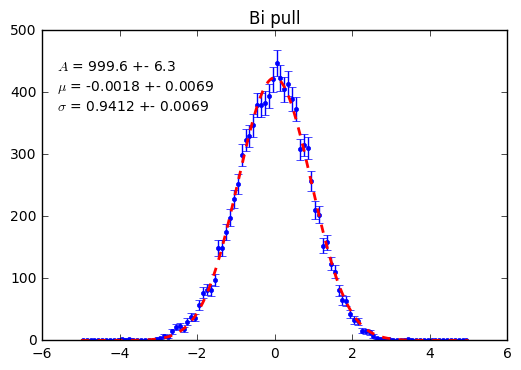

In [115]:
pull_Bi = pull_list[:,2]
h_bi = np.histogram(pull_Bi,bins=100,range=[-lim,lim])
fit_bi = ff.fit_gauss(h_bi[1][:-1] + np.diff(h_bi[1])/2.,h_bi[0],[100,0,1])
res_bi = [fit_bi[0], 0]
res_bi[1] = np.sqrt(np.diag(fit_bi[1]))

plt.errorbar(h_bi[1][:-1] + np.diff(h_bi[1])/2.,h_bi[0],h_bi[0]**0.5,marker='.',linestyle='None')
plt.plot(xp, fun(xp,res_bi[0][0],res_bi[0][1],res_bi[0][2]),linewidth=2,color='red',linestyle='--')
plt.figtext(0.15,0.8, ('$A$ = %0.1f +- %0.1f' % (res_bi[0][0] , res_bi[1][0])))
plt.figtext(0.15,0.75, ('$\mu$ = %0.4f +- %0.4f' % (res_bi[0][1] , res_bi[1][1])))
plt.figtext(0.15,0.7, ('$\sigma$ = %0.4f +- %0.4f' % (res_bi[0][2] , res_bi[1][2])))
plt.title('Bi pull')
plt.savefig("Bi_pull.pdf")

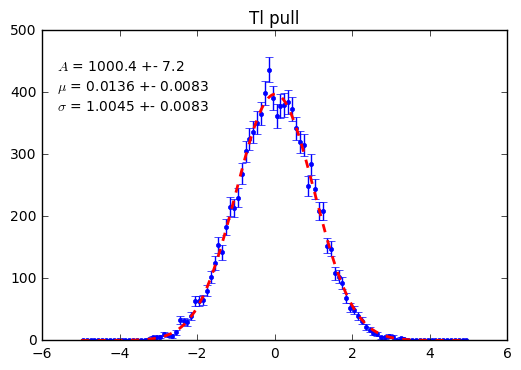

In [114]:
pull_Tl = pull_list[:,3]
h_tl = np.histogram(pull_Tl,bins=100,range=[-lim,lim])
fit_tl = ff.fit_gauss(h_tl[1][:-1] + np.diff(h_tl[1])/2.,h_tl[0],[100,0,1])
res_tl = [fit_tl[0], 0]
res_tl[1] = np.sqrt(np.diag(fit_tl[1]))

plt.errorbar(h_tl[1][:-1] + np.diff(h_tl[1])/2.,h_tl[0],h_tl[0]**0.5,marker='.',linestyle='None')
plt.plot(xp, fun(xp,res_tl[0][0],res_tl[0][1],res_tl[0][2]),linewidth=2,color='red',linestyle='--')
plt.figtext(0.15,0.8, ('$A$ = %0.1f +- %0.1f' % (res_tl[0][0] , res_tl[1][0])))
plt.figtext(0.15,0.75, ('$\mu$ = %0.4f +- %0.4f' % (res_tl[0][1] , res_tl[1][1])))
plt.figtext(0.15,0.7, ('$\sigma$ = %0.4f +- %0.4f' % (res_tl[0][2] , res_tl[1][2])))
plt.title('Tl pull')
plt.savefig("Tl_pull.pdf")

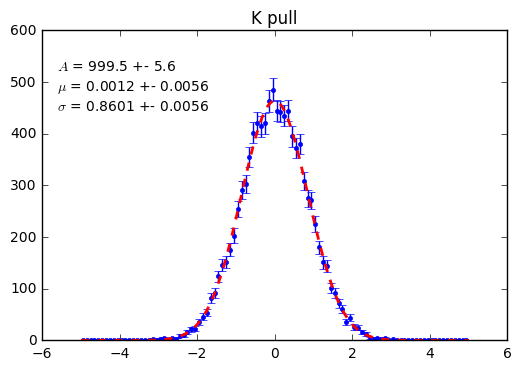

In [113]:
pull_K = pull_list[:,1]
h_k = np.histogram(pull_K,bins=100,range=[-lim,lim])
fit_k = ff.fit_gauss(h_k[1][:-1] + np.diff(h_k[1])/2.,h_k[0],[100,0,1])
res_k = [fit_k[0], 0]
res_k[1] = np.sqrt(np.diag(fit_k[1]))

plt.errorbar(h_k[1][:-1] + np.diff(h_k[1])/2.,h_k[0],h_k[0]**0.5,marker='.',linestyle='None')
plt.plot(xp, fun(xp,res_k[0][0],res_k[0][1],res_k[0][2]),linewidth=2,color='red',linestyle='--')
plt.figtext(0.15,0.8, ('$A$ = %0.1f +- %0.1f' % (res_k[0][0] , res_k[1][0])))
plt.figtext(0.15,0.75, ('$\mu$ = %0.4f +- %0.4f' % (res_k[0][1] , res_k[1][1])))
plt.figtext(0.15,0.7, ('$\sigma$ = %0.4f +- %0.4f' % (res_k[0][2] , res_k[1][2])))
plt.title('K pull')
plt.savefig("K_pull.pdf")

/home/brais/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/brais/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


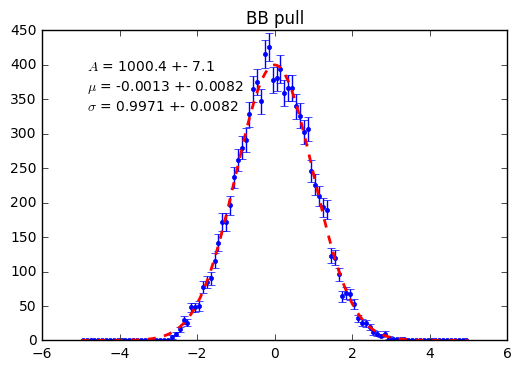

In [112]:
pull_bb = pull_list[:,4]
h_bb = np.histogram(pull_bb,bins=100,range=[-lim,lim])
fit_bb = ff.fit_gauss(h_bb[1][:-1] + np.diff(h_bb[1])/2.,h_bb[0],[100,0,1])
res_bb = [fit_bb[0], 0]
res_bb[1] = np.sqrt(np.diag(fit_bb[1]))

plt.errorbar(h_bb[1][:-1] + np.diff(h_bb[1])/2.,h_bb[0],h_bb[0]**0.5,marker='.',linestyle='None')
plt.plot(xp, fun(xp,res_k[0][0],res_k[0][1],res_bb[0][2]),linewidth=2,color='red',linestyle='--')
plt.figtext(0.2,0.8, ('$A$ = %0.1f +- %0.1f' % (res_bb[0][0] , res_bb[1][0])))
plt.figtext(0.2,0.75, ('$\mu$ = %0.4f +- %0.4f' % (res_bb[0][1] , res_bb[1][1])))
plt.figtext(0.2,0.7, ('$\sigma$ = %0.4f +- %0.4f' % (res_bb[0][2] , res_bb[1][2])))
plt.title('BB pull')
plt.savefig("BB_pull.pdf")

In [117]:

fit_bb

(array([  1.00035628e+03,  -1.31792351e-03,   9.97084657e-01]),
 array([[  5.01471734e+01,   3.42530786e-08,   3.33220451e-02],
        [  3.42530786e-08,   6.64260510e-05,   6.08539925e-11],
        [  3.33220451e-02,   6.08539925e-11,   6.64259992e-05]]))

In [119]:
res_bb

[array([  1.00035628e+03,  -1.31792351e-03,   9.97084657e-01]),
 array([ 7.08146689,  0.00815022,  0.00815021])]

In [121]:
np.diag(fit_bb[1])**0.5

array([ 7.08146689,  0.00815022,  0.00815021])